In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
tr_num = pd.read_csv('data/train_num_p.csv')
tr_cat = pd.read_csv('data/train_cat_p.csv')
tr_cat['revenue_log'] = np.log1p(tr_cat.revenue)

## Numeric features

In [4]:
tr_num.describe()

,id,budget,popularity,runtime,revenue,runtime_h,runtime_m,revenue_log,runtime_log,budget_log,popularity_log
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,1500.500000,2.266135e+07,8.463274,107.784667,6.668176e+07,1.239667,33.404667,15.972774,4.655350,11.961359,1.975396e+00
std,866.169729,3.702662e+07,12.104000,22.253944,1.375149e+08,0.467225,15.540144,3.035788,0.366837,7.403049,7.416869e-01
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.693147,0.000000,0.000000,9.999995e-07
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,1.000000,25.000000,14.691625,4.553877,0.000000,1.613042e+00
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,1.000000,36.000000,16.637310,4.653960,15.894952,2.125233e+00
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,1.000000,45.000000,18.046365,4.779123,17.216708,2.475780e+00
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,5.000000,59.000000,21.141685,5.826000,19.755682,5.688117e+00


C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


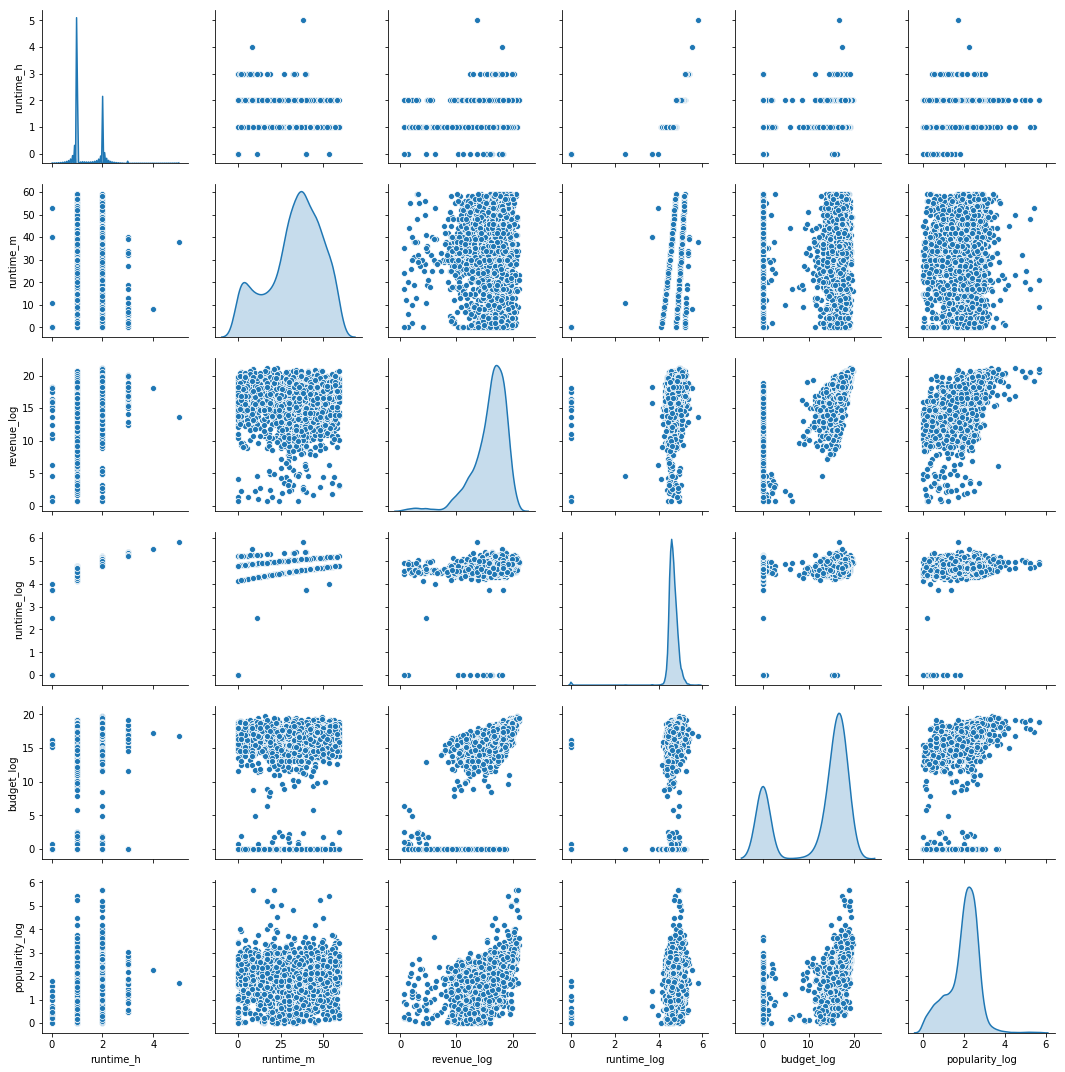

In [5]:
sns.pairplot(tr_num.iloc[:, 5:11], diag_kind = 'kde')

## Categorical features

### genres

In [6]:
tr_cat.columns

Index(['genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'spoken_languages',
       'status', 'is_collection', 'is_homepage', 'n_genres', 'n_prod_comp',
       'n_prod_count', 'n_spoken_lang', 'year', 'month', 'day', 'weekofday',
       'quarter', 'cast_gender', 'cast_male', 'cast_female', 'cast_neutral',
       'n_cast', 'crew_job', 'n_crew_job', 'n_crew', 'crew_department',
       'n_crew_department', 'crew_gender', 'crew_male', 'crew_female',
       'crew_neutral', 'n_crew_profile', 'revenue_log'],
      dtype='object')

In [7]:
tr_cat['genres'] = tr_cat.genres.map(lambda row: row.split(';')[:-1])

In [8]:
tr_cat.sample(5)

,genres,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,status,is_collection,is_homepage,...,n_crew_job,n_crew,crew_department,n_crew_department,crew_gender,crew_male,crew_female,crew_neutral,n_crew_profile,revenue_log
2842,"[Action, Comedy, Crime, Drama, Thriller]",en,Miramax Films;,DE;US;,2005-05-12,17297244.0,en;pl;,Released,False,False,...,12,32,Production;Production;Production;Production;Pr...,8,7;4;21,7,4,21,4,16.666058
2570,"[Adventure, Animation, Family, Fantasy]",en,Golden Mean;Playtone;ImageMovers;,US;,2004-11-10,305875730.0,en;,Released,False,False,...,102,147,Sound;Sound;Writing;Directing;Production;Produ...,11,4;105;38,4,105,38,13,19.538689
1591,"[Comedy, Horror]",en,Amblin Entertainment;Hollywood Pictures;Tangle...,US;,1990-08-09,53208180.0,en;es;,Released,False,False,...,9,14,Directing;Production;Production;Writing;Writin...,6,1;1;12,1,1,12,9,17.789723
510,"[Crime, Drama]",en,Columbia Pictures;Horizon Pictures;,US;,1954-06-22,9600000.0,en;,Released,False,False,...,11,11,Directing;Writing;Production;Sound;Camera;Edit...,8,0;2;9,0,2,9,5,16.077274
1823,"[Comedy, Horror]",en,Dark Horse Entertainment;Image Entertainment;,US;,2007-10-01,173066.0,en;,Released,False,True,...,3,3,Directing;Production;Writing;,3,0;0;3,0,0,3,2,12.061434


In [9]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(tr_cat.genres).astype('int')
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [10]:
df_genres = pd.DataFrame(X, columns = mlb.classes_)

In [11]:
df_genres = pd.concat([df_genres, tr_cat.revenue_log], axis = 1)

In [12]:
df_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_log
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,16.588099
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15.182615


In [13]:
# Frequency per genres
df_genres.iloc[:, :-1].sum(axis = 0).sort_values()[::-1]

Drama              1535
Comedy             1030
Thriller            790
Action              742
Romance             573
Crime               469
Adventure           440
Horror              301
Science Fiction     290
Family              260
Fantasy             233
Mystery             226
Animation           141
History             132
Music               100
War                 100
Documentary          87
Western              43
Foreign              31
TV Movie              1
dtype: int64

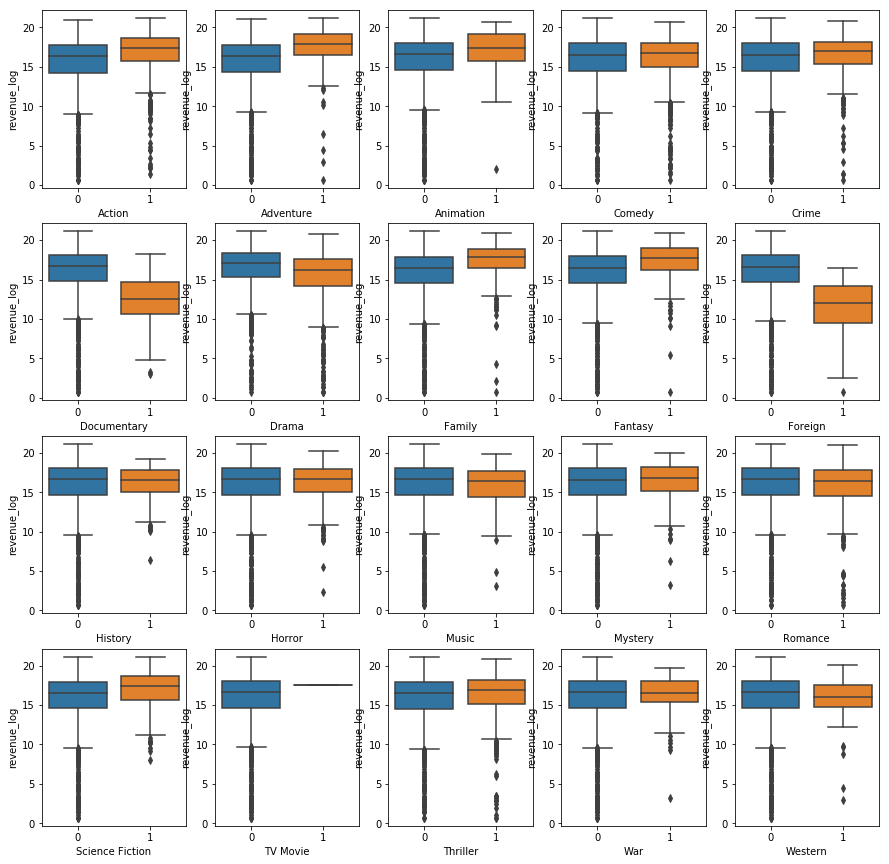

In [14]:
# Revernue distribution per genres 
plt.figure(figsize = (15, 15))
for i in range(len(df_genres.columns[:-1])):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_genres.iloc[:, i], y = df_genres.revenue_log)
plt.show()

In [15]:
# Mean encoding


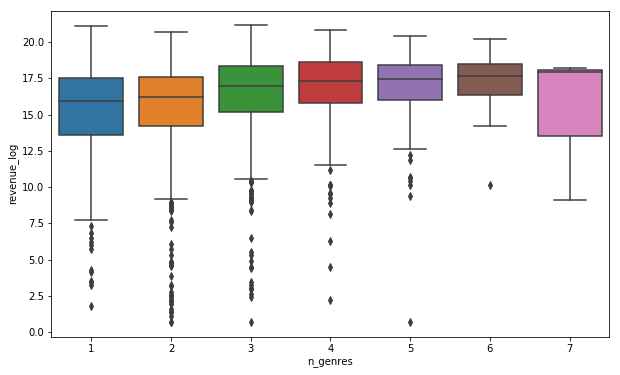

In [16]:
# Number of genres vs. Revenue
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_genres, y = tr_cat.revenue_log)

In [17]:
tr_cat.groupby(tr_cat.n_genres)['revenue_log'].mean()

n_genres
1    15.258256
2    15.491729
3    16.397228
4    16.912266
5    16.763969
6    17.152661
7    15.088890
Name: revenue_log, dtype: float64

### production countries

In [18]:
tr_cat.head()

,genres,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,status,is_collection,is_homepage,...,n_crew_job,n_crew,crew_department,n_crew_department,crew_gender,crew_male,crew_female,crew_neutral,n_crew_profile,revenue_log
0,[Comedy],en,Paramount Pictures;United Artists;Metro-Goldwy...,US;,2015-02-20,12314651.0,en;,Released,True,False,...,59,72,Directing;Directing;Writing;Writing;Production...,11,0;59;13,0,59,13,6,16.326300
1,"[Comedy, Drama, Family, Romance]",en,Walt Disney Pictures;,US;,2004-08-06,95149435.0,en;,Released,True,False,...,7,9,Directing;Camera;Sound;Production;Editing;Prod...,6,4;1;4,4,1,4,6,18.370959
2,[Drama],en,Bold Films;Blumhouse Productions;Right of Way ...,US;,2014-10-10,13092000.0,en;,Released,False,True,...,46,64,Production;Sound;Production;Costume & Make-Up;...,11,4;49;11,4,49,11,5,16.387512
3,"[Thriller, Drama]",hi,Boundscript;Pen Movies;Viacom18 Motion Pictures;,IN;,2012-03-09,16000000.0,en;hi;,Released,False,True,...,3,3,Directing;Production;Writing;,3,0;3;0,0,3,0,0,16.588099
4,"[Action, Thriller]",ko,No info,KR;,2009-02-05,3923970.0,ko;,Released,False,False,...,2,2,Directing;Writing;,2,0;2;0,0,2,0,0,15.182615


In [19]:
tr_cat['production_countries'] = tr_cat.production_countries.map(lambda row: row.split(';')[:-1])

In [20]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(tr_cat.production_countries).astype('int')
mlb.classes_

array(['AE', 'AR', 'AT', 'AU', 'BA', 'BE', 'BF', 'BG', 'BR', 'BS', 'CA',
       'CH', 'CL', 'CN', 'CR', 'CS', 'CY', 'CZ', 'DE', 'DK', 'DZ', 'ES',
       'ET', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IR', 'IS', 'IT', 'JO', 'JP', 'KH', 'KR', 'LU', 'MA',
       'MN', 'MR', 'MT', 'MX', 'NA', 'NL', 'NO', 'NZ', 'PE', 'PH', 'PK',
       'PL', 'PR', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SG',
       'SI', 'TH', 'TN', 'TR', 'TW', 'UA', 'US', 'UY', 'ZA'], dtype=object)

In [21]:
df_prod_count = pd.DataFrame(X, columns = mlb.classes_)
df_prod_count = pd.concat([df_prod_count, tr_cat.revenue_log], axis = 1)
df_prod_count.head()

,AE,AR,AT,AU,BA,BE,BF,BG,BR,BS,...,SI,TH,TN,TR,TW,UA,US,UY,ZA,revenue_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16.326300
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16.387512
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182615


In [22]:
top20_count = df_prod_count.iloc[:, :-1].sum(axis = 0).sort_values()[::-1][:20].index
top20_count

Index(['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT', 'AU', 'JP', 'RU', 'ES', 'CN',
       'HK', 'BE', 'IE', 'KR', 'MX', 'SE', 'NZ', 'NL'],
      dtype='object')

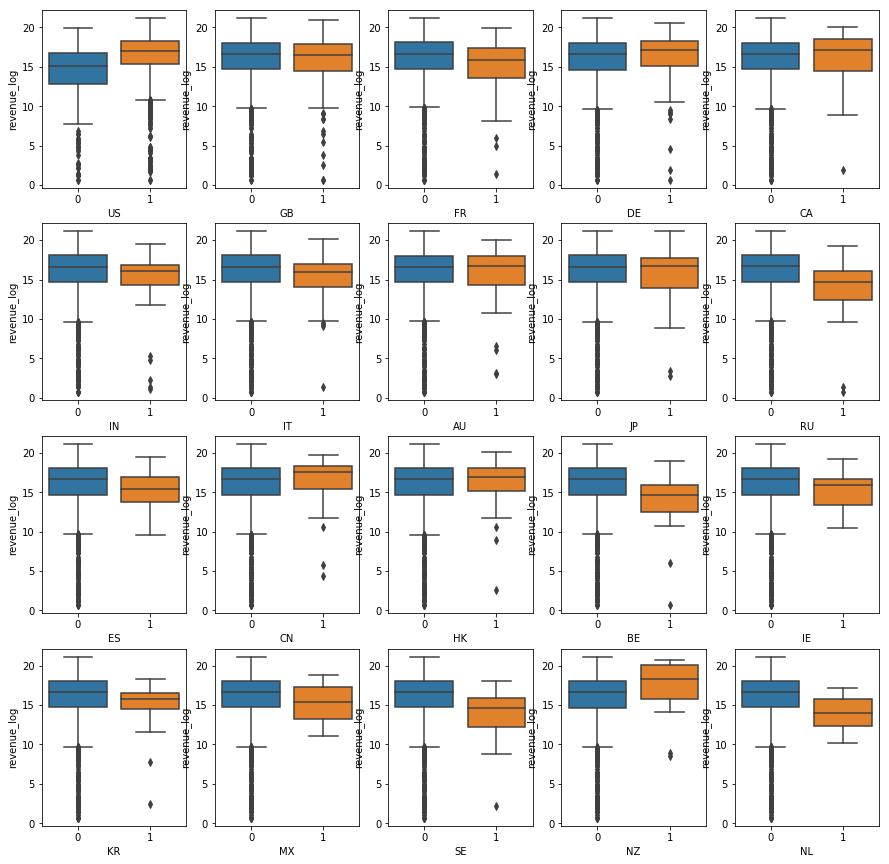

In [23]:
plt.figure(figsize = (15, 15))
for i in range(len(top20_count)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_prod_count[top20_count[i]], y = df_prod_count.revenue_log,data = df_prod_count)

In [24]:
tr_cat.groupby(tr_cat.n_prod_count)['revenue_log'].median()

n_prod_count
1    16.606676
2    16.817093
3    16.498455
4    17.046435
5    16.119788
6    14.113946
8    16.634289
Name: revenue_log, dtype: float64

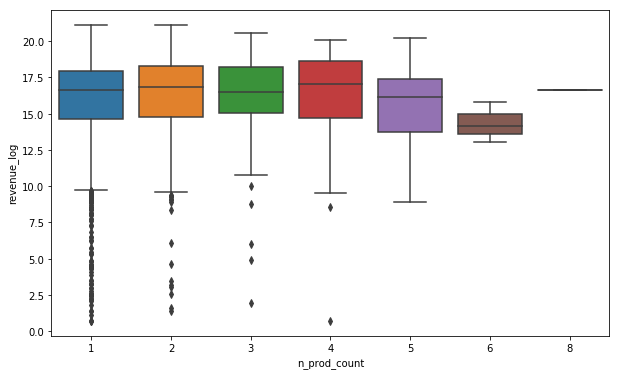

In [25]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_prod_count, y = tr_cat.revenue_log)

### original language & spoken langauge

In [26]:
print("spoken language min: {}, max: {}".format(tr_cat.n_spoken_lang.min(), tr_cat.n_spoken_lang.max()))

spoken language min: 1, max: 9


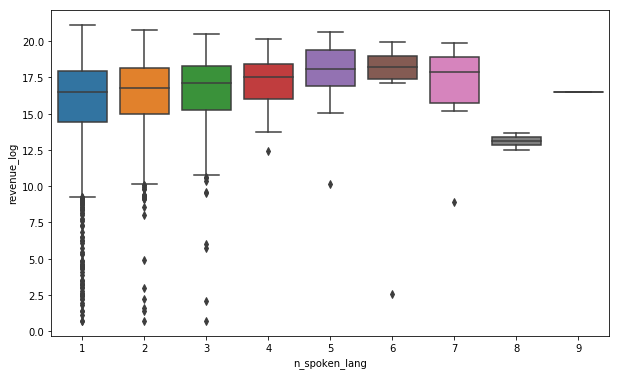

In [27]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_spoken_lang, y = tr_cat.revenue_log)

In [28]:
tr_cat.groupby(tr_cat.n_spoken_lang)['revenue_log'].mean()
# mean encoding???


n_spoken_lang
1    15.794581
2    16.175950
3    16.448364
4    17.235305
5    17.887769
6    15.870793
7    16.458253
8    13.098653
9    16.498231
Name: revenue_log, dtype: float64

In [31]:
tr_cat['spoken_languages'] = tr_cat.spoken_languages.apply(lambda row: row.split(';'))
X = mlb.fit_transform(tr_cat.spoken_languages).astype('int')
mlb.classes_

array(['', 'af', 'am', 'ar', 'bg', 'bn', 'bo', 'ca', 'cn', 'cs', 'da',
       'de', 'el', 'en', 'eo', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'ga',
       'gd', 'gu', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'is', 'it', 'ja',
       'kk', 'km', 'ko', 'ku', 'kw', 'la', 'ln', 'lo', 'mi', 'ml', 'mr',
       'my', 'nl', 'no', 'nv', 'ny', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro',
       'ru', 'sa', 'sh', 'si', 'sk', 'so', 'sq', 'sr', 'st', 'sv', 'sw',
       'ta', 'te', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'wo', 'xh', 'xx',
       'yi', 'zh', 'zu'], dtype=object)

In [32]:
df_langs = pd.DataFrame(X, columns = mlb.classes_)
df_langs = pd.concat([df_langs.iloc[:, 1:], tr_cat.revenue_log], axis = 1)
df_langs.head()

,af,am,ar,bg,bn,bo,ca,cn,cs,da,...,uk,ur,vi,wo,xh,xx,yi,zh,zu,revenue_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182615


In [33]:
n_langs = df_langs.iloc[:, :-1].sum(axis = 0).astype('int').sort_values(ascending = False)
top20_langs = n_langs.head(20).keys()
btm10_langs = n_langs.tail(10).keys()

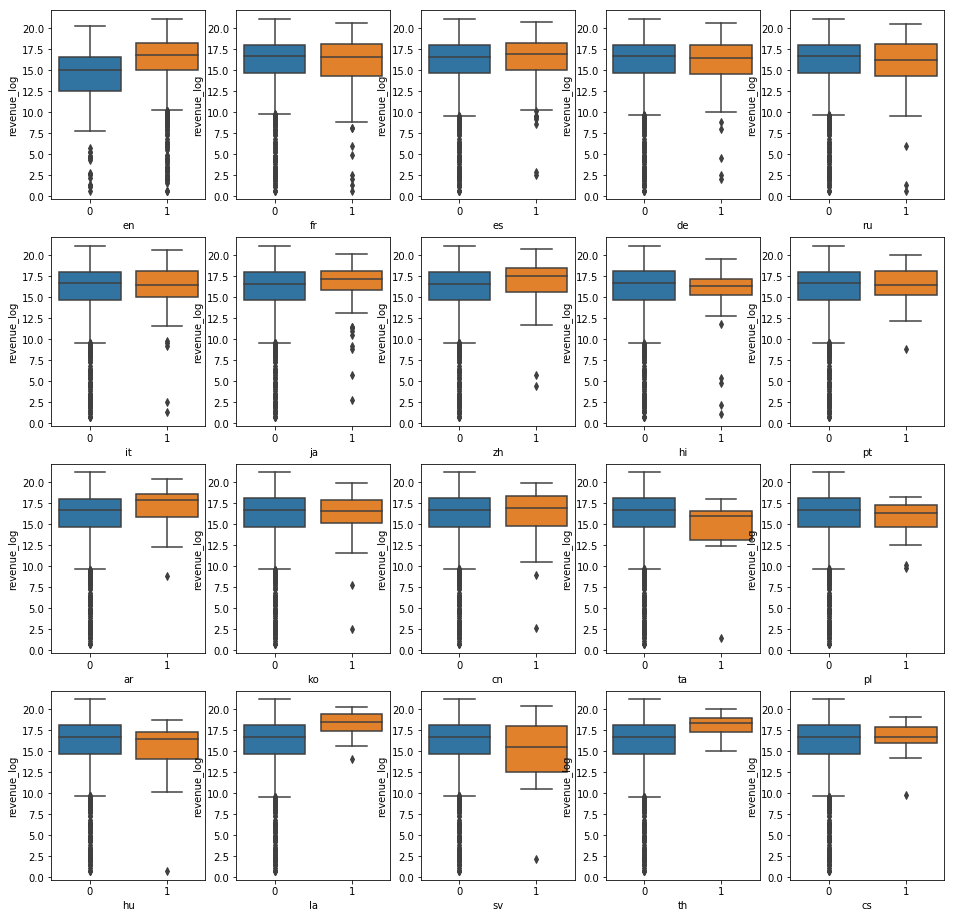

In [34]:
# 10 most frequently spoken languages
plt.figure(figsize = (16, 16))
for i in range(len(top20_langs)):
    a = top20_langs[i]
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_langs.loc[:, a], y = df_langs.revenue_log)
plt.show()

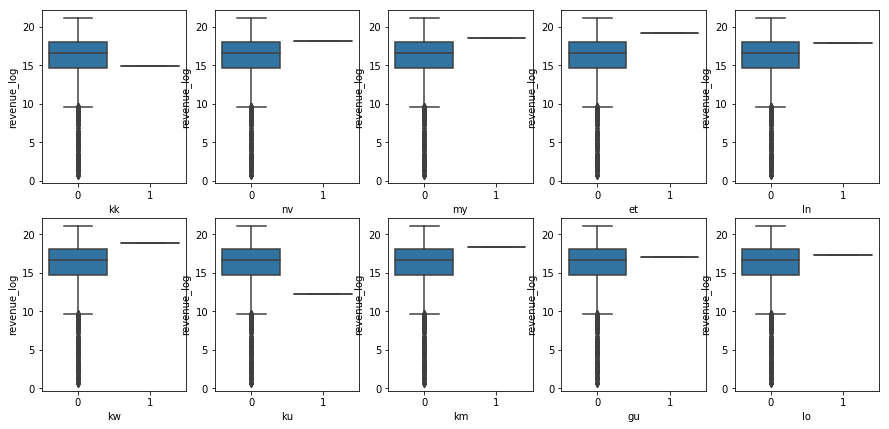

In [35]:
# 10 least frequently spoken languages
plt.figure(figsize = (15, 7))
for i in range(len(btm10_langs)):
    a = btm10_langs[i]
    plt.subplot(2, 5, i+1)
    sns.boxplot(x = df_langs.loc[:, a], y = df_langs.revenue_log)
plt.show()
# Too little data... not gonna use it

In [36]:
# Most common original langauges
lang_top15 = tr_cat.original_language.value_counts().head(15)
lang_top15

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
Name: original_language, dtype: int64

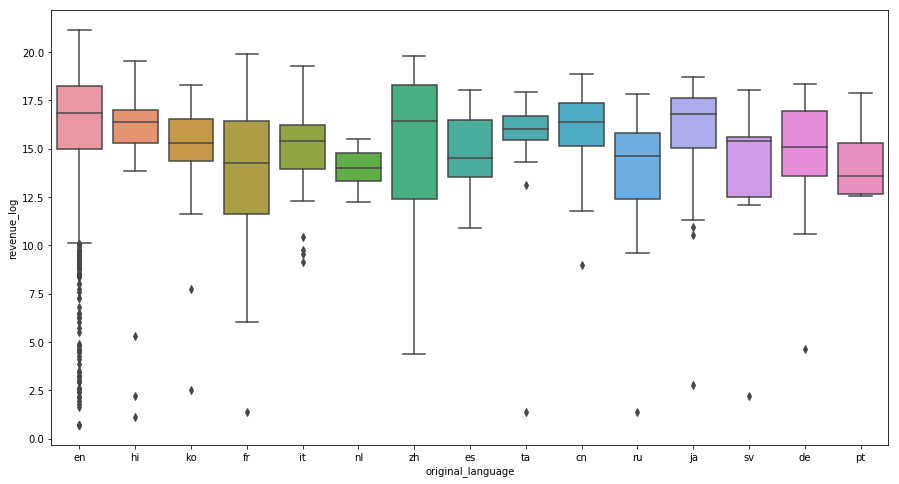

In [37]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'original_language', y = 'revenue_log', data = tr_cat[tr_cat.original_language.isin(lang_top15.index)])

In [38]:
# mean encoding for each original language
lang_avg = tr_cat.groupby(tr_cat.original_language)['revenue_log'].mean()

### production_companies

In [4]:
tr_cat.head()

,genres,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,status,is_collection,is_homepage,...,n_crew_job,n_crew,crew_department,n_crew_department,crew_gender,crew_male,crew_female,crew_neutral,n_crew_profile,revenue_log
0,Comedy;,en,Paramount Pictures;United Artists;Metro-Goldwy...,US;,2015-02-20,12314651.0,en;,Released,True,False,...,59,72,Directing;Directing;Writing;Writing;Production...,11,0;59;13,0,59,13,6,16.326300
1,Comedy;Drama;Family;Romance;,en,Walt Disney Pictures;,US;,2004-08-06,95149435.0,en;,Released,True,False,...,7,9,Directing;Camera;Sound;Production;Editing;Prod...,6,4;1;4,4,1,4,6,18.370959
2,Drama;,en,Bold Films;Blumhouse Productions;Right of Way ...,US;,2014-10-10,13092000.0,en;,Released,False,True,...,46,64,Production;Sound;Production;Costume & Make-Up;...,11,4;49;11,4,49,11,5,16.387512
3,Thriller;Drama;,hi,Boundscript;Pen Movies;Viacom18 Motion Pictures;,IN;,2012-03-09,16000000.0,en;hi;,Released,False,True,...,3,3,Directing;Production;Writing;,3,0;3;0,0,3,0,0,16.588099
4,Action;Thriller;,ko,No info,KR;,2009-02-05,3923970.0,ko;,Released,False,False,...,2,2,Directing;Writing;,2,0;2;0,0,2,0,0,15.182615


In [5]:
tr_cat.production_companies.sample(5)

1870                       Miramax Films;Palace Pictures;
1847    The Documentary Foundation;Artisan Productions...
380     Bedford Falls Productions;Lonely Film Producti...
1113                                              Filmax;
1184    Fox 2000 Pictures;Temple Hill Entertainment;TS...
Name: production_companies, dtype: object

In [ ]:
tr_cat['production_companies'] = tr_cat.production_companies.map(lambda row: row.split(';')[:-1])

In [7]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(tr_cat.production_companies).astype('int')

In [8]:
df_prod_comp = pd.DataFrame(X, columns = mlb.classes_)

In [10]:
df_prod_comp['revenue_log'] = tr_cat.revenue_log

In [11]:
df_prod_comp.head()

,"""DIA"" Productions GmbH & Co. KG",1000 Volt,1019 Entertainment,10th Hole Productions,120 Films,120dB Films,13 Productions,1492 Pictures,1818,19 Entertainment,...,Интерфест,Квартал-95,Кинокомпания «Lunapark»,Леополис,Реал-Дакота,Роскинопрокат,СТВ,Флагман-Трейд,Фокс,revenue_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182615


In [15]:
n_comp = df_prod_comp.iloc[:, :-1].sum(axis = 0).sort_values(ascending = False)
top30_comp = n_comp.head(30).keys()
btm20_comp = n_comp.tail(20).keys()
top30_comp

Index(['Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures',
       'Walt Disney Pictures', 'Columbia Pictures Corporation',
       'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists',
       'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises',
       'Working Title Films', 'Fox Searchlight Pictures', 'Dune Entertainment',
       'BBC Films', 'StudioCanal', 'Lionsgate', 'DreamWorks SKG',
       'Orion Pictures', 'Fox 2000 Pictures', 'Hollywood Pictures',
       'Summit Entertainment', 'Dimension Films', 'Amblin Entertainment'],
      dtype='object')

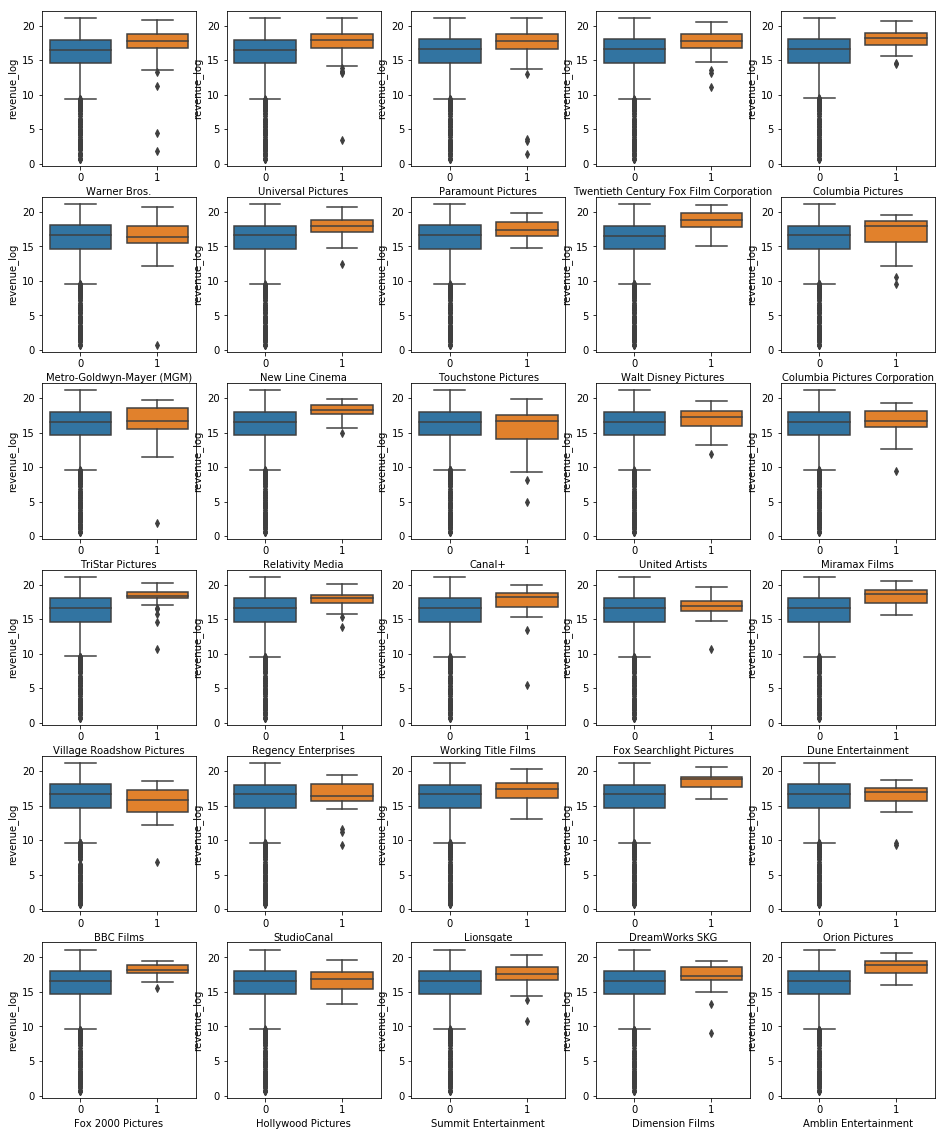

In [20]:
plt.figure(figsize = (16, 20))
for i in range(30):
    a = top30_comp[i]
    plt.subplot(6, 5, i+1)
    sns.boxplot(x = df_prod_comp.loc[:, a], y = df_prod_comp.revenue_log)
plt.show()

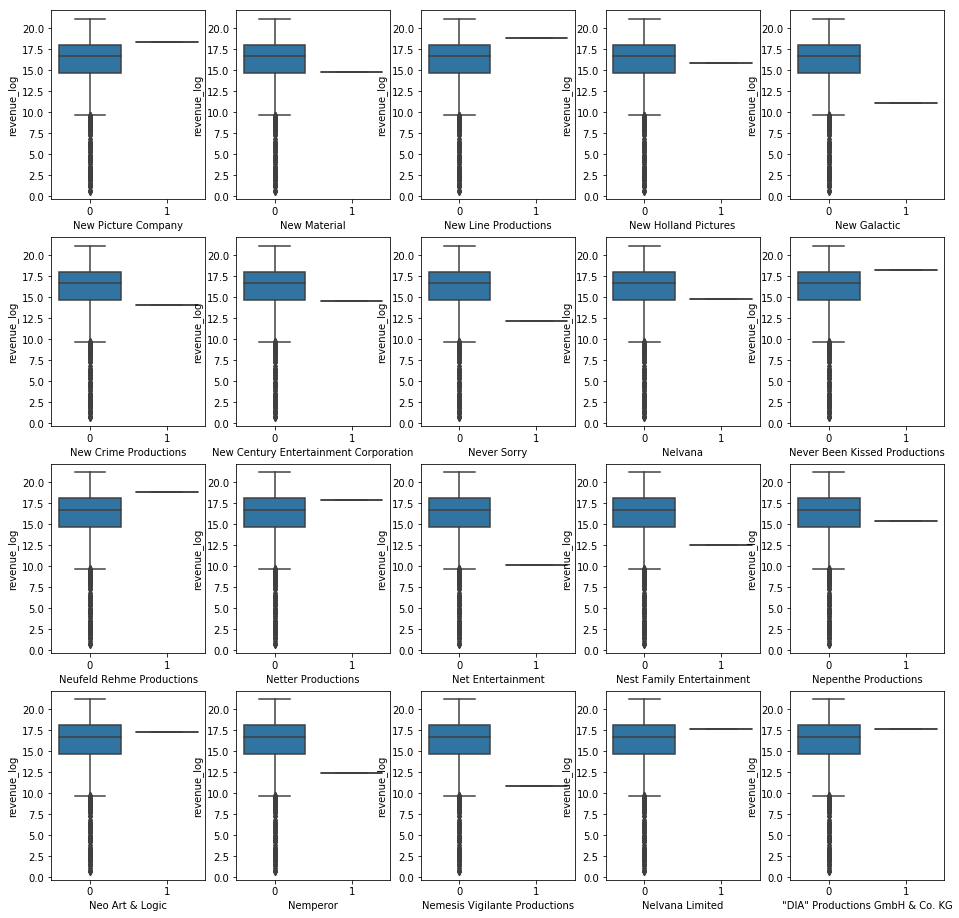

In [17]:
plt.figure(figsize = (16, 16))
for i in range(20):
    a = btm20_comp[i]
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_prod_comp.loc[:, a], y = df_prod_comp.revenue_log)
plt.show()

I'll take only the 100 company lists that have significant gaps in revenue

In [27]:
dict_comp = {}
for col in df_prod_comp.columns:
    a = df_prod_comp.revenue_log[df_prod_comp[col] == 0].median()
    b = df_prod_comp.revenue_log[df_prod_comp[col] == 1].median()
    gap = np.abs(a-b)
    dict_comp[col] = gap

In [36]:
import operator
sorted_dict_comp = sorted(dict_comp.items(), key=operator.itemgetter(1), reverse=True)

In [40]:
gap_comp = []
for c_v in sorted_dict_comp[:100]:
    c, _ = c_v 
    gap_comp.append(c)

In [42]:
df_prod_comp.loc[:, gap_comp].head()

,An Erich von Stroheim Production,Avrora Media,Cobblestone Pictures,Comet Film Produktion GmbH,People Tree Films,Adel Productions,Goldmine Tele Films,Kavithalayaa Productions,Инвада фильм,Кинокомпания «Lunapark»,...,Filmation Associates,Code Red,Viddywell Productions,General Film Corporation,Cicala Filmworks,Poppoli Pictures,Iris productions,Kickstart Productions,Mythic International Entertainment,Raindance Entertainment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# The number of companies
print("Min : {}, Max : {}".format(tr_cat.n_prod_comp.min(), tr_cat.n_prod_comp.max()))

Min : 0, Max : 17


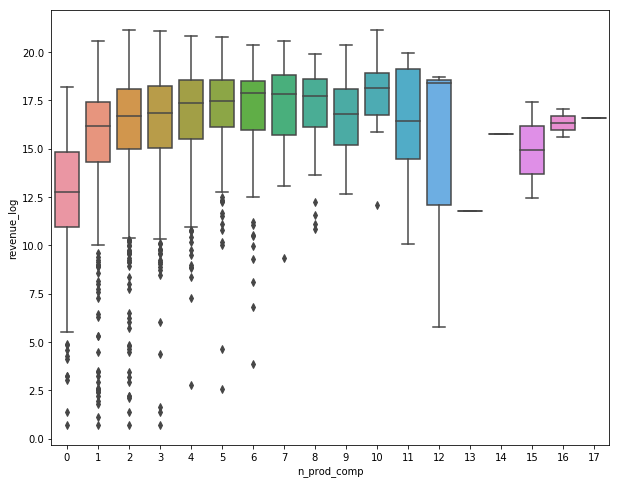

In [42]:
plt.figure(figsize = (10, 8))
sns.boxplot(tr_cat.n_prod_comp, tr_cat.revenue_log)

In [43]:
tr_cat.groupby(tr_cat.n_prod_comp)['revenue_log'].mean()

n_prod_comp
0     12.469561
1     15.498182
2     16.099513
3     16.245040
4     16.704832
5     16.962448
6     16.809689
7     17.197220
8     16.923155
9     16.698257
10    17.502369
11    16.229122
12    14.275258
13    11.747713
14    15.741342
15    14.910898
16    16.334977
17    16.566377
Name: revenue_log, dtype: float64

### is_collection

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


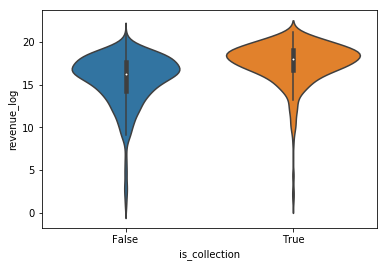

In [48]:
sns.violinplot(tr_cat.is_collection, tr_cat.revenue_log)

In [49]:
tr_cat.groupby(tr_cat.is_collection)['revenue_log'].mean()

is_collection
False    15.567722
True     17.525986
Name: revenue_log, dtype: float64

### status

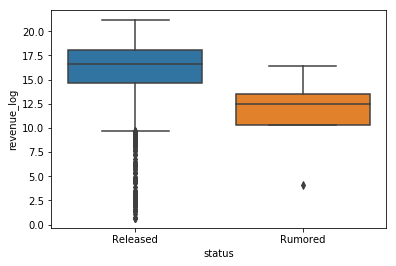

In [50]:
sns.boxplot(tr_cat.status, tr_cat.revenue_log)

In [51]:
tr_cat.groupby(tr_cat.status)['revenue_log'].mean()

status
Released    15.968149
Rumored     11.346014
Name: revenue_log, dtype: float64

### release date

In [52]:
print('revenue range from {} to {}'.format(tr_cat.release_date.min(), tr_cat.release_date.max()))

revenue range from 1921-01-21 to 2017-07-20


In [53]:
tr_cat['year_avg'] = tr_cat.groupby(['year'])['revenue_log'].transform('mean')
tr_cat['year_count'] = tr_cat.groupby('year')['revenue'].transform('count')

In [54]:
tr_cat2 = tr_cat.set_index('release_date').sort_index()
tr_cat2.head()

,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,is_collection,is_homepage,n_genres,...,crew_department,n_crew_department,crew_gender,crew_male,crew_female,crew_neutral,n_crew_profile,revenue_log,year_avg,year_count
release_date,,,,,,,,,,,,,,,,,,,,,
1921-01-21,"[Comedy, Drama]",en,Charles Chaplin Productions;First National Pic...,[US],2500000.0,"[xx, ]",Released,False,False,2,...,Directing;Camera;Art;Editing;Production;Writin...,8,0;4;8,0,4,8,5,14.731802,14.731802,1
1924-03-18,"[Action, Adventure, Drama, Family, Fantasy]",en,Douglas Fairbanks Pictures;,[US],1213880.0,"[xx, ]",Released,False,False,5,...,Camera;Directing;Art;Art;Production;Sound;Art;...,11,0;13;15,0,13,15,9,14.009333,14.009333,1
1925-08-26,"[Romance, Drama]",en,Metro-Goldwyn-Mayer (MGM);An Erich von Strohei...,[US],1.0,"[en, ]",Released,False,False,2,...,Production;Camera;Costume & Make-Up;Art;Direct...,7,0;9;8,0,9,8,8,0.693147,5.704903,2
1925-12-24,"[Drama, History]",ru,Goskino Productions;Mosfilm;,[RU],45100.0,"[ru, ]",Released,False,False,2,...,Directing;Production;Editing;Editing;Art;Sound...,8,1;14;5,1,14,5,6,10.716660,5.704903,2
1926-05-14,[Drama],en,Pickford Corporation;,[US],966878.0,"[en, ]",Released,False,False,1,...,Directing;Production;Writing;Writing;Directing;,3,1;2;2,1,2,2,2,13.781829,13.781829,1


In [55]:
tr_cat = pd.read_csv('data/train_cat_p.csv')
tr_cat['release_date'] = pd.to_datetime(tr_cat.release_date)
tr_cat = tr_cat.set_index('release_date')
tr_cat['revenue_log'] = np.log1p(tr_cat.revenue)

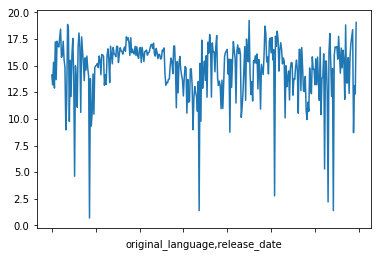

In [56]:
index_year = tr_cat.index.year 
year_avg = tr_cat.groupby(['original_language', index_year])['revenue_log'].mean()
year_avg.plot()

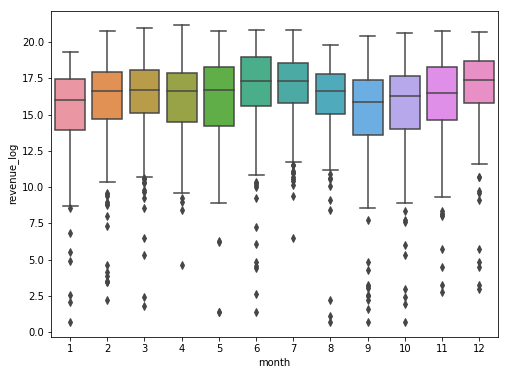

In [57]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.month, y = tr_cat.revenue_log)

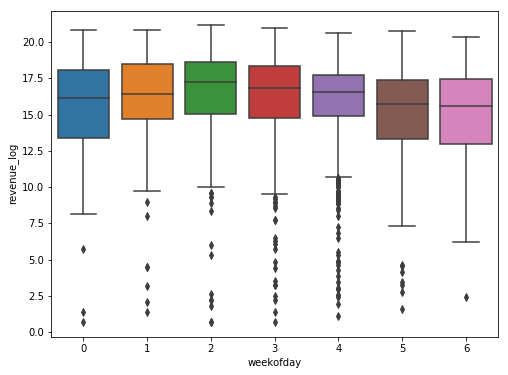

In [58]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.weekofday, y = tr_cat.revenue_log)

### crew department & job
- Crew department

In [54]:
tr_cat.crew_department[tr_cat.crew_department.isnull()] = ''

C:\Users\jjone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
tr_cat['crew_department'] = tr_cat.crew_department.apply(lambda row: row.split(';')[:-1])
X = mlb.fit_transform(tr_cat.crew_department).astype('int')
len(mlb.classes_)

12

In [56]:
mlb.classes_

array(['Actors', 'Art', 'Camera', 'Costume & Make-Up', 'Crew',
       'Directing', 'Editing', 'Lighting', 'Production', 'Sound',
       'Visual Effects', 'Writing'], dtype=object)

In [59]:
df_crew_d = pd.DataFrame(X, columns=mlb.classes_)
df_crew_d.head()

,Actors,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing
0,0,1,1,1,1,1,1,1,1,1,1,1
1,0,0,1,0,0,1,1,0,1,1,0,1
2,0,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1


In [61]:
df_crew_d['revenue_log'] = tr_cat.revenue_log

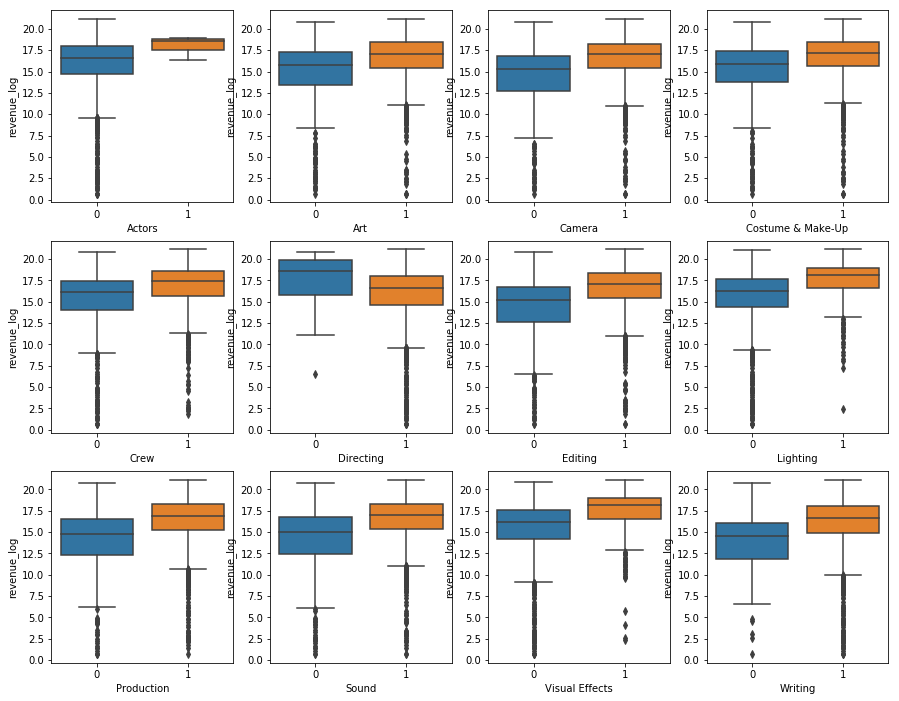

In [68]:
plt.figure(figsize = (15, 12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x = df_crew_d.columns[i], y = df_crew_d.revenue_log, data = df_crew_d)

- Crew jobs

In [72]:
tr_cat.crew_job.sample(5)

1057    [Makeup Artist, Director, Screenplay, Screenpl...
2379    [Producer, Producer, Executive Producer, Produ...
191     [Casting, Music, Editor, Costume Design, Produ...
432     [Director, Screenplay, Screenplay, Novel, Orig...
609                 [Director, Animation, Visual Effects]
Name: crew_job, dtype: object

In [73]:
tr_cat.crew_job[tr_cat.crew_job.isnull()] = ''

C:\Users\jjone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tr_cat['crew_job'] = tr_cat.crew_job.apply(lambda row: row.split(';')[:-1])

In [75]:
X = mlb.fit_transform(tr_cat.crew_job).astype('int')

In [76]:
len(mlb.classes_)

412

### cast & crew numbers

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


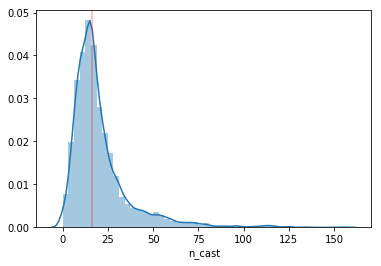

In [88]:
sns.distplot(tr_cat.n_cast)
plt.axvline(x = tr_cat.n_cast.median(), color = 'red', alpha = .3)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


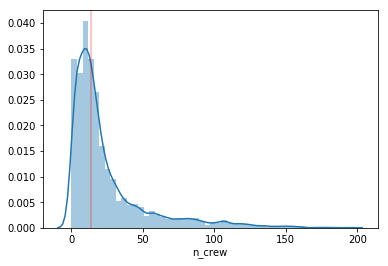

In [89]:
sns.distplot(tr_cat.n_crew)
plt.axvline(x = tr_cat.n_crew.median(), color = 'red', alpha = .3)
plt.show()

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


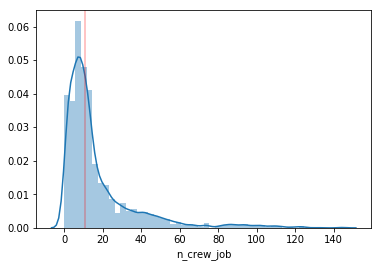

In [62]:
sns.distplot(tr_cat.n_crew_job)
plt.axvline(x = tr_cat.n_crew_job.median(), color = 'red', alpha = .3)

In [60]:
tr_cat['n_cast_log'] = np.log1p(tr_cat.n_cast)
tr_cat['n_crew_log'] = np.log1p(tr_cat.n_crew)
tr_cat['n_crew_job_log'] = np.log1p(tr_cat.n_crew_job)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


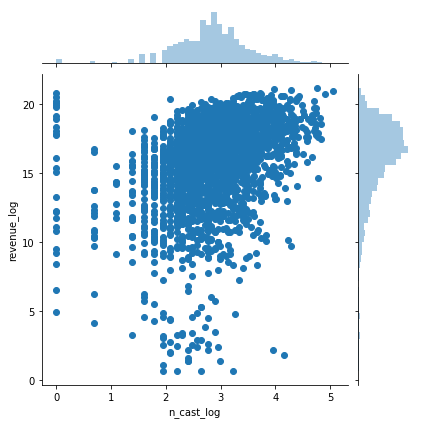

In [90]:
#sns.jointplot(x = tr_cat['n_cast'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_cast_log'], y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


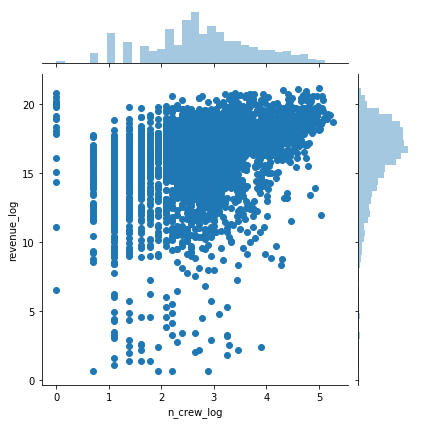

In [93]:
#sns.jointplot(x = tr_cat['n_crew'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_crew_log'], y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


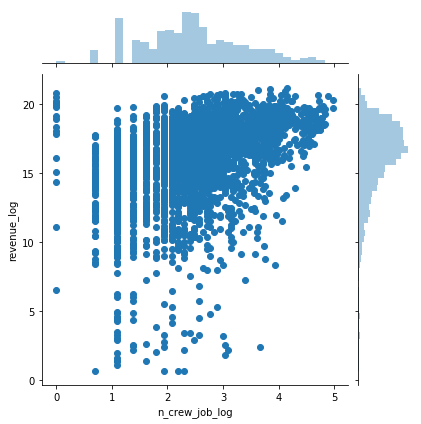

In [92]:
#sns.jointplot(x = tr_cat['n_crew_job'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_crew_job_log'], y = tr_cat.revenue_log, kind = 'scatter')

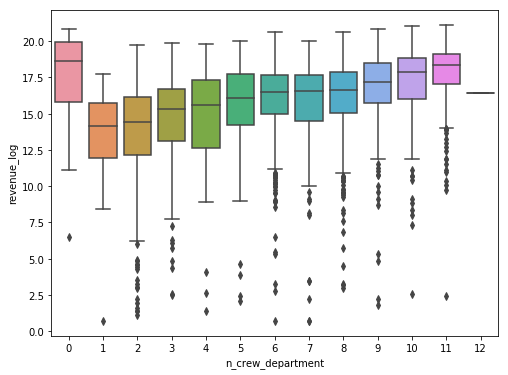

In [67]:
# The number of departments vs. revenue_log
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.n_crew_department, y = tr_cat.revenue_log, data = tr_cat)

### crew gender 
- Male crew

In [69]:
#sns.jointplot(x = tr_cat.crew_male, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


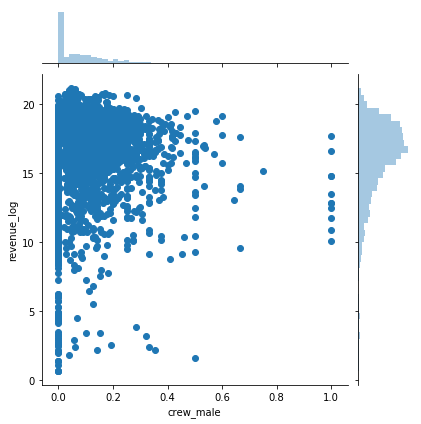

In [70]:
tr_cat['crew_male'] /= tr_cat.n_crew
sns.jointplot(x = tr_cat.crew_male, y = tr_cat.revenue_log, kind = 'scatter')

- Female crew

In [71]:
#sns.jointplot(x = tr_cat.crew_female, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


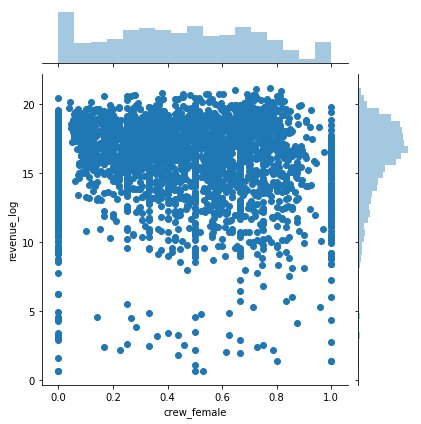

In [72]:
tr_cat['crew_female'] /= tr_cat.n_crew
sns.jointplot(x = tr_cat.crew_female, y = tr_cat.revenue_log, kind = 'scatter')

- Neutral crew

In [73]:
#sns.jointplot(x = tr_cat.crew_neutral, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


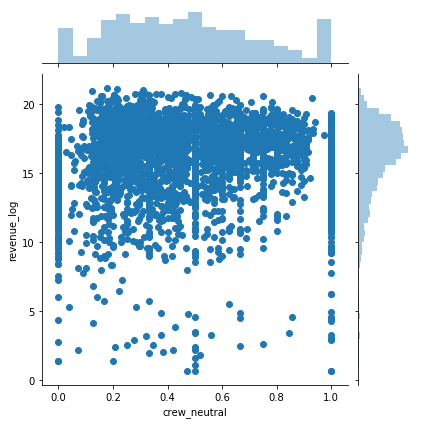

In [74]:
tr_cat['crew_neutral'] /= tr_cat.n_crew
sns.jointplot(x = tr_cat.crew_neutral, y = tr_cat.revenue_log, kind = 'scatter')

### cast gender
- Male cast

In [75]:
#sns.jointplot(x = tr_cat.cast_male, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


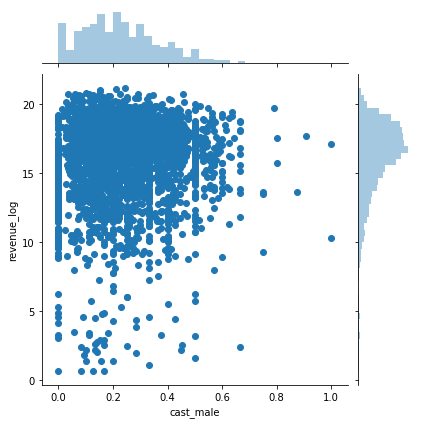

In [76]:
tr_cat['cast_male'] /= tr_cat.n_cast
sns.jointplot(x = tr_cat.cast_male, y = tr_cat.revenue_log, kind = 'scatter')

- Female cast

In [77]:
#sns.jointplot(x = tr_cat.cast_female, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


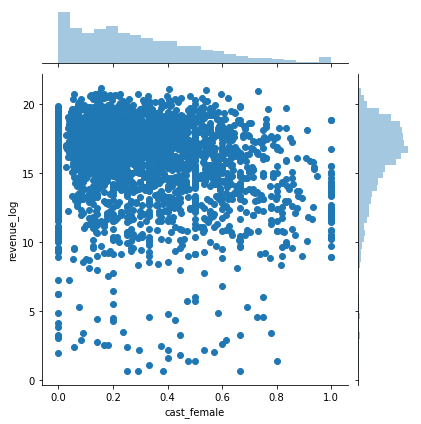

In [78]:
tr_cat['cast_female'] /= tr_cat.n_cast
sns.jointplot(x = tr_cat.cast_female, y = tr_cat.revenue_log, kind = 'scatter')

- Neutral cast

In [79]:
#sns.jointplot(x = tr_cat.cast_neutral, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


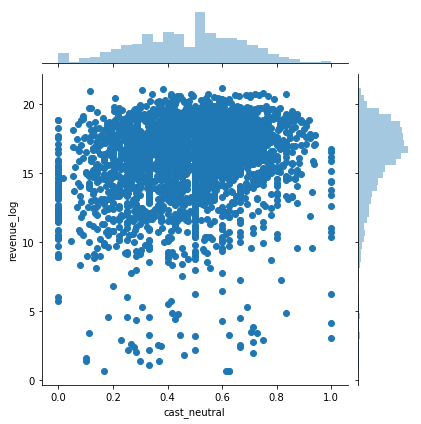

In [80]:
tr_cat['cast_neutral'] /= tr_cat.n_cast
sns.jointplot(x = tr_cat.cast_neutral, y = tr_cat.revenue_log, kind = 'scatter')

### crew profile url

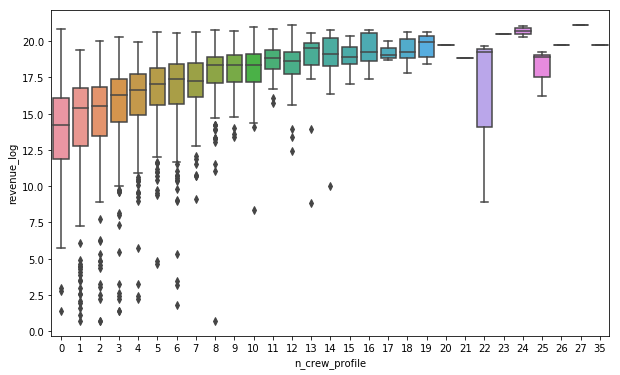

In [81]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_crew_profile, y = tr_cat.revenue_log, data = tr_cat)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


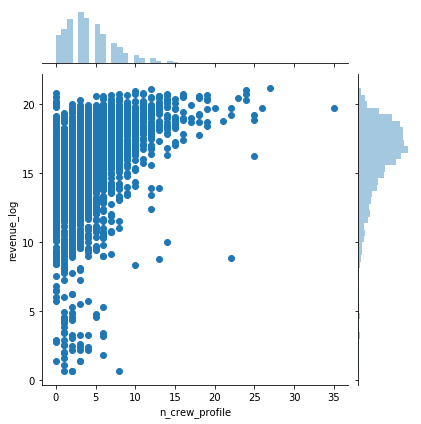

In [82]:
sns.jointplot(x = tr_cat.n_crew_profile, y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


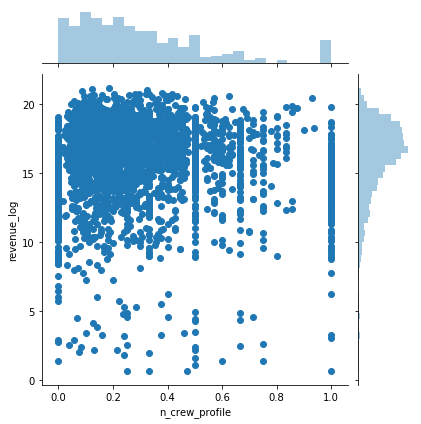

In [83]:
tr_cat.n_crew_profile[tr_cat.n_crew_profile.isnull()] = 0
tr_cat['n_crew_profile'] /= tr_cat.n_crew
sns.jointplot(x = tr_cat.n_crew_profile, y = tr_cat.revenue_log, kind = 'scatter')

# Correlation Heatmap

<Figure size 1800x1800 with 0 Axes>

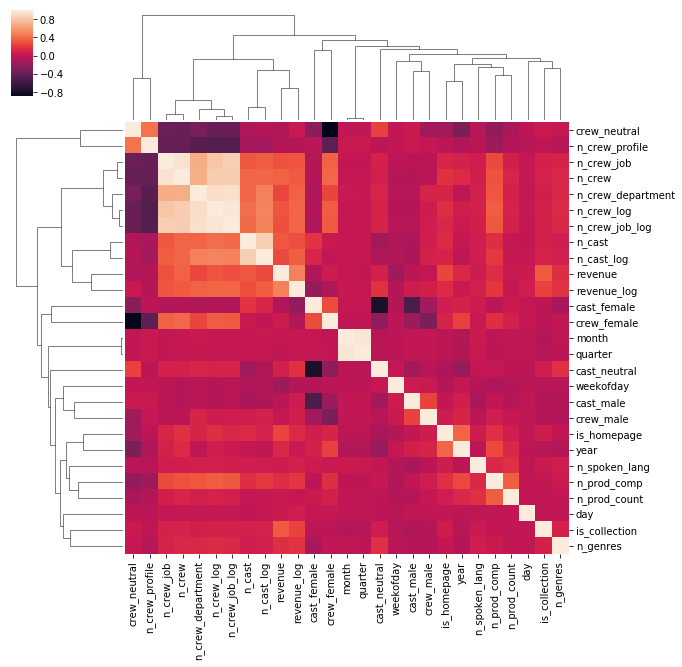

In [84]:
plt.figure(figsize = (25, 25))
sns.clustermap(tr_cat.corr())

Will remove due to inter-correlations
- cast_female, cast_neutral (include only the ratio of male casts as cast_male)
- crew_female, crew_neutral (same)
- n_crew_job 
- n_crew_department (crew_department Encoding) 

In [94]:
tr_cat.head()

,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,is_collection,is_homepage,n_genres,...,n_crew_department,crew_gender,crew_male,crew_female,crew_neutral,n_crew_profile,revenue_log,n_cast_log,n_crew_log,n_crew_job_log
release_date,,,,,,,,,,,,,,,,,,,,,
2015-02-20,Comedy;,en,Paramount Pictures;United Artists;Metro-Goldwy...,US;,12314651.0,en;,Released,True,False,1,...,11,0;59;13,0.000000,0.819444,0.180556,0.083333,16.326300,3.218876,4.290459,4.094345
2004-08-06,Comedy;Drama;Family;Romance;,en,Walt Disney Pictures;,US;,95149435.0,en;,Released,True,False,4,...,6,4;1;4,0.444444,0.111111,0.444444,0.666667,18.370959,3.044522,2.302585,2.079442
2014-10-10,Drama;,en,Bold Films;Blumhouse Productions;Right of Way ...,US;,13092000.0,en;,Released,False,True,1,...,11,4;49;11,0.062500,0.765625,0.171875,0.078125,16.387512,3.951244,4.174387,3.850148
2012-03-09,Thriller;Drama;,hi,Boundscript;Pen Movies;Viacom18 Motion Pictures;,IN;,16000000.0,en;hi;,Released,False,True,2,...,3,0;3;0,0.000000,1.000000,0.000000,0.000000,16.588099,2.079442,1.386294,1.386294
2009-02-05,Action;Thriller;,ko,No info,KR;,3923970.0,ko;,Released,False,False,2,...,2,0;2;0,0.000000,1.000000,0.000000,0.000000,15.182615,1.609438,1.098612,1.098612
